In [ ]:
import io # for storing uploaded dataset in pandas
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting points in graph
import matplotlib.colors as mcolors
from google.colab import drive # mounting google drive
import math # for mathematical operations


In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/My Colab Notebook/Pattern Recognition/Assignments/assignment-1/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_file = pd.read_csv(file_path+'/train.txt', sep=" " , header = None, dtype = 'float64')

training_data = np.array(training_file)

print('Training data: \n',training_data)
testing_file = pd.read_csv(file_path+'/test.txt', sep=" " , header = None, dtype = 'float64')
testing_data = np.array(testing_file)
print('Testing data: \n',testing_data)


Training data: 
 [[ 2.  2.  1.]
 [ 3.  1.  1.]
 [-4.  3.  2.]
 [ 3.  3.  1.]
 [-1. -3.  1.]
 [ 2.  6.  2.]
 [ 4.  2.  1.]
 [-2. -2.  1.]
 [ 0.  0.  2.]
 [-2.  2.  2.]
 [-1. -1.  2.]
 [-4.  2.  2.]]
Testing data: 
 [[-1. -5.  1.]
 [ 3.  2.  1.]
 [-2.  1.  2.]
 [ 8.  2.  1.]
 [ 6. -1.  1.]
 [ 0.  2.  1.]
 [-3.  0.  2.]]


In [ ]:
X=[]
y=[]
for row in training_data:
   temp=[]
   temp.append(int(row[0]))
   temp.append(int(row[1]))
   X.append(temp)


for row in training_data:
   temp=[]
   temp.append(int(row[2]))
   y.append(temp)


for row in testing_data:
    temp=[]
    temp.append(int(row[0]))
    temp.append(int(row[1]))
    X.append(temp)

for row in testing_data:
    temp=[]
    temp.append(int(row[2]))
    y.append(temp)



X=np.array(X)
y=np.array(y)
print(X)
print('----------')
print(y)

[[ 2  2]
 [ 3  1]
 [-4  3]
 [ 3  3]
 [-1 -3]
 [ 2  6]
 [ 4  2]
 [-2 -2]
 [ 0  0]
 [-2  2]
 [-1 -1]
 [-4  2]
 [-1 -5]
 [ 3  2]
 [-2  1]
 [ 8  2]
 [ 6 -1]
 [ 0  2]
 [-3  0]]
----------
[[1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]]


In [ ]:
df = pd.DataFrame(data=X,columns=['0','1'])

labels = pd.DataFrame(data=y,columns=['2'])
df = pd.concat([df,labels],axis='columns')
df

,0,1,2
0,2,2,1
1,3,1,1
2,-4,3,2
3,3,3,1
4,-1,-3,1
5,2,6,2
6,4,2,1
7,-2,-2,1
8,0,0,2
9,-2,2,2


https://machinelearningmastery.com/linear-discriminant-analysis-with-python/

In [ ]:
# make a prediction with a lda model on the dataset
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=112)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy: 0.850 (0.229)


**https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508**

In [ ]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap='Spectral')
    plt.scatter(X[:, 0], X[:, 1], c=y , alpha=0.8,s=20,edgecolor='k',
            cmap = mcolors.ListedColormap(["black", "green"]) )
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

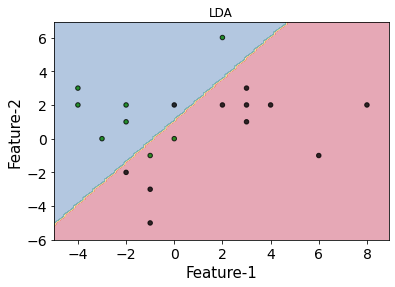

In [ ]:
plt.figure()
plt.title("LDA")
plot_decision_boundaries(X,y,LinearDiscriminantAnalysis)
plt.show()